In [4]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



Sensor data gathered from wrist

Sitting Accelerometer Data


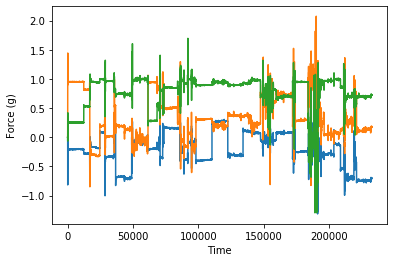

Sitting Gyroscope Data


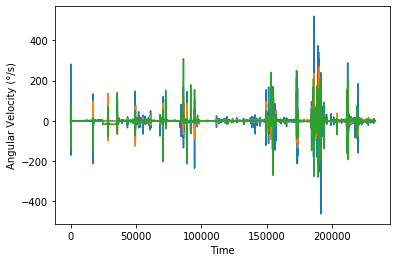

Lying Accelerometer Data


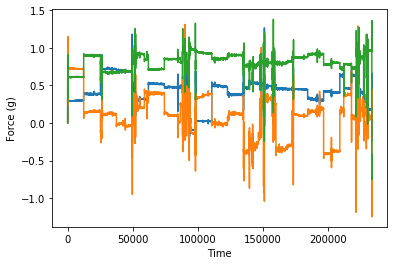

Lying Gyroscope Data


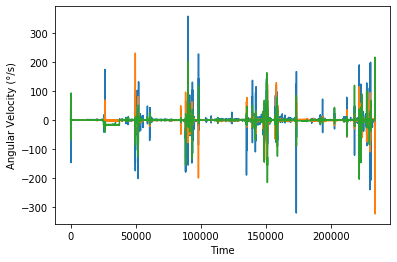

Standing Accelerometer Data


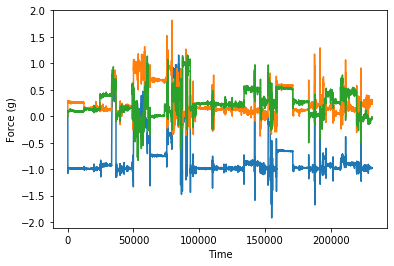

Standing Gyroscope Data


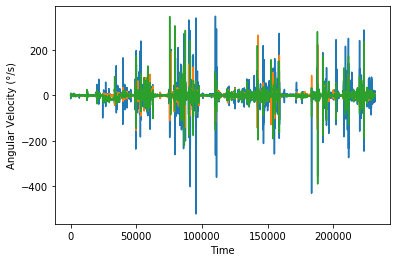

Washing dishes Accelerometer Data


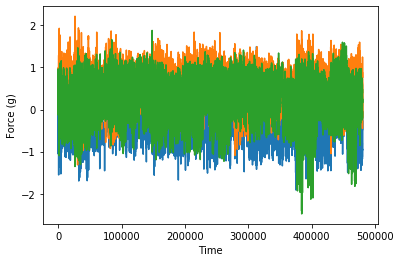

Washing dishes Gyroscope Data


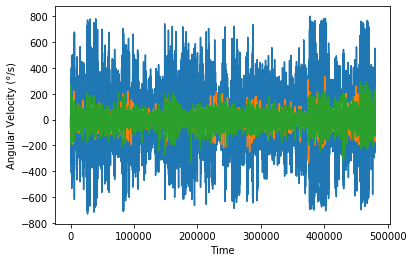

Vacuuming Accelerometer Data


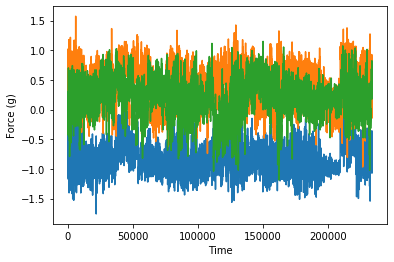

Vacuuming Gyroscope Data


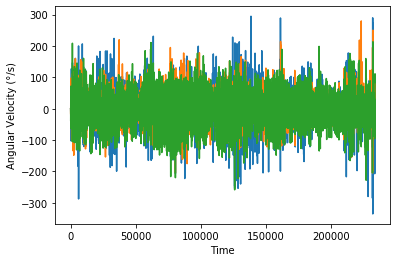

Sweeping Accelerometer Data


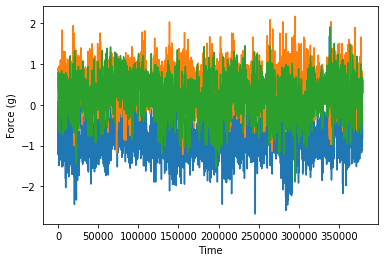

Sweeping Gyroscope Data


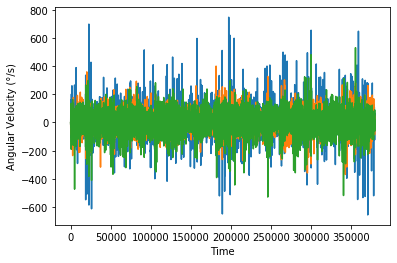

Walking Accelerometer Data


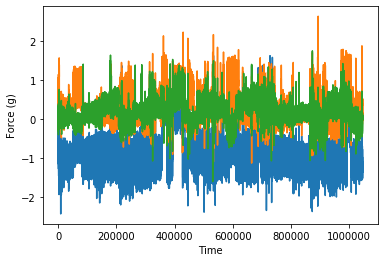

Walking Gyroscope Data


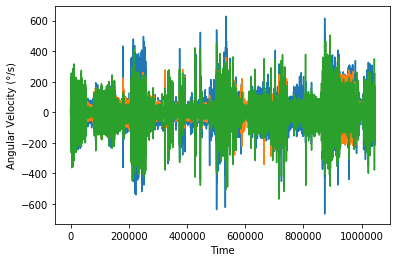

Ascending stairs Accelerometer Data


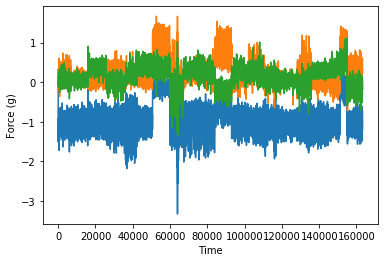

Ascending stairs Gyroscope Data


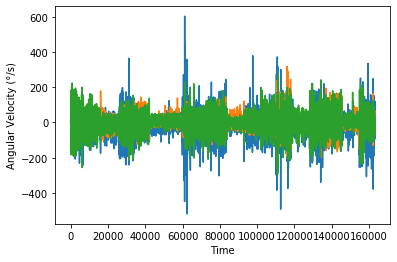

Descending stairs Accelerometer Data


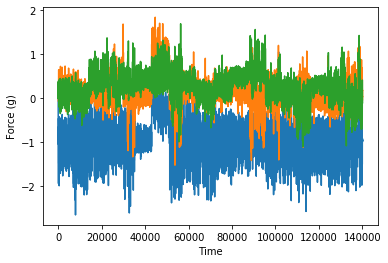

Descending stairs Gyroscope Data


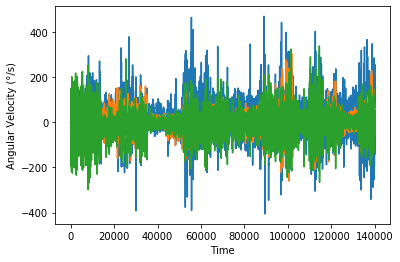

Treadmill running Accelerometer Data


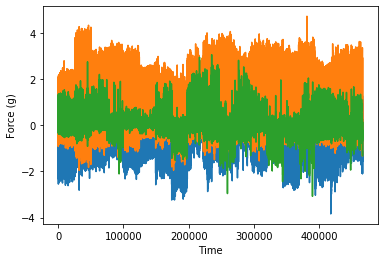

Treadmill running Gyroscope Data


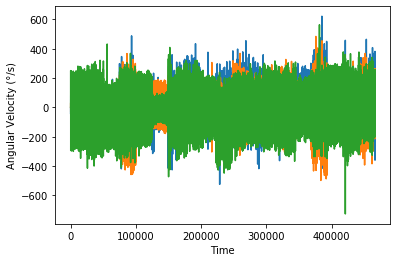

Bicycling (500W) Accelerometer Data


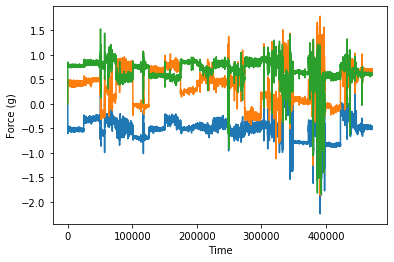

Bicycling (500W) Gyroscope Data


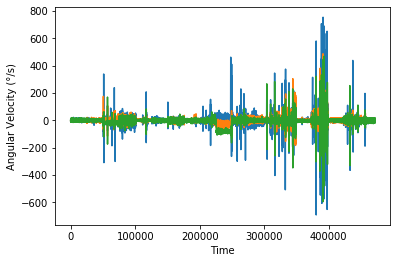

Bicycling (100W) Accelerometer Data


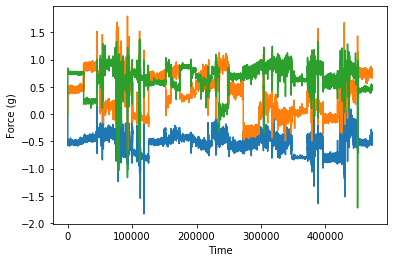

Bicycling (100W) Gyroscope Data


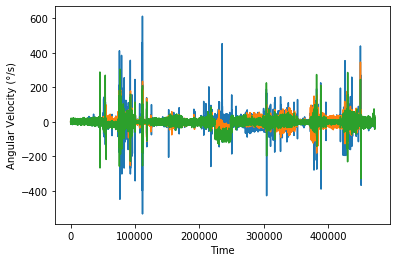

Rope jumping Accelerometer Data


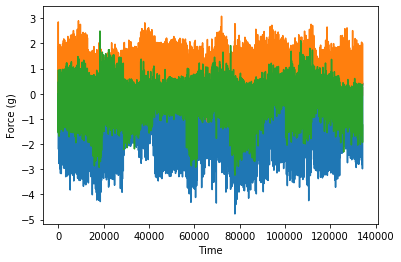

Rope jumping Gyroscope Data


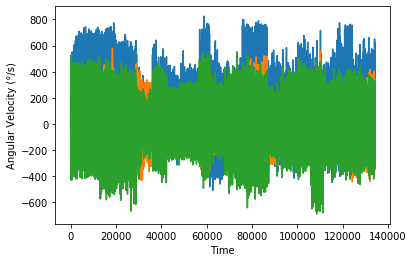

In [5]:
activity = ["Sitting", "Lying", "Standing", "Washing dishes", "Vacuuming", "Sweeping", "Walking", "Ascending stairs", "Descending stairs", "Treadmill running", "Bicycling (500W)", "Bicycling (100W)", "Rope jumping"]

# read dataset file
# df = pd.read_csv('dataset/dataset_1.txt', sep=',', header=None)
df = pd.read_csv('dataset/dataset_' + str(file + 1) + '.txt', sep=',', header=None)
for file in range(1,19):
    #df = pd.read_csv('dataset/dataset_' + str(file + 1) + '.txt', sep=',', header=None)
    df = df.append(pd.read_csv('dataset/dataset_' + str(file + 1) + '.txt', sep=',', header=None))
    """df_sitting = df[df[24] == 1].values
    
    # In this example code, only accelerometer 1 data (column 1 to 3) is used
    plt.plot(df_sitting[:, 0:3])
    plt.show()"""
    
print("Sensor data gathered from wrist\n")

# 1-14 being the 13 activity labels
for c in range(1, 14): 
    activity_data = df[df[24] == c].values

    b, a = signal.butter(4, 0.04, 'low', analog=False)
    for j in range(24):
        activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])

    # examine acc #1 data (column 1-3)
    print(str(activity[c-1]) + " Accelerometer Data")
    plt.plot(activity_data[:, 0:3])
    plt.xlabel("Time")
    plt.ylabel("Force (g)")
    plt.show()

    # examine gyro #1 data (column 3-6)
    print(str(activity[c-1]) + " Gyroscope Data")
    plt.plot(activity_data[:, 3:6])
    plt.xlabel("Time")
    plt.ylabel("Angular Velocity (°/s)")
    plt.show()

    """# examine acc/gyro #1 data (column 1-6)
    print(str(activity[c-1]) + " Accelerometer & Gyroscope Data")
    plt.plot(activity_data[500:1000, 0:6])
    plt.xlabel("Time")
    plt.show()"""


In [6]:
training = np.empty(shape=(0, 10))
testing = np.empty(shape=(0, 10))
# deal with each dataset file
for i in range(19):
    df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)
    print('deal with dataset ' + str(i + 1))
    for c in range(1, 14):
        activity_data = df[df[24] == c].values
        b, a = signal.butter(4, 0.04, 'low', analog=False)
        for j in range(24):
            activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])

        datat_len = len(activity_data)
        training_len = math.floor(datat_len * 0.8)
        training_data = activity_data[:training_len, :]
        testing_data = activity_data[training_len:, :]

        # data segementation: for time series data, we need to segment the whole time series, and then extract features from each period of time
        # to represent the raw data. In this example code, we define each period of time contains 1000 data points. Each period of time contains 
        # different data points. You may consider overlap segmentation, which means consecutive two segmentation share a part of data points, to 
        # get more feature samples.
        training_sample_number = training_len // 1000 + 1
        testing_sample_number = (datat_len - training_len) // 1000 + 1

        for s in range(training_sample_number):
            if s < training_sample_number - 1:
                sample_data = training_data[1000*s:1000*(s + 1), :]
            else:
                sample_data = training_data[1000*s:, :]
            # in this example code, only three accelerometer data in wrist sensor is used to extract three simple features: min, max, and mean value in
            # a period of time. Finally we get 9 features and 1 label to construct feature dataset. You may consider all sensors' data and extract more

            feature_sample = []
            for i in range(3):
                feature_sample.append(np.min(sample_data[:, i]))
                feature_sample.append(np.max(sample_data[:, i]))
                feature_sample.append(np.mean(sample_data[:, i]))
            feature_sample.append(sample_data[0, -1])
            feature_sample = np.array([feature_sample])
            training = np.concatenate((training, feature_sample), axis=0)

        for s in range(testing_sample_number):
            if s < training_sample_number - 1:
                sample_data = testing_data[1000*s:1000*(s + 1), :]
            else:
                sample_data = testing_data[1000*s:, :]

            feature_sample = []
            for i in range(3):
                feature_sample.append(np.min(sample_data[:, i]))
                feature_sample.append(np.max(sample_data[:, i]))
                feature_sample.append(np.mean(sample_data[:, i]))
            feature_sample.append(sample_data[0, -1])
            feature_sample = np.array([feature_sample])
            testing = np.concatenate((testing, feature_sample), axis=0)

df_training = pd.DataFrame(training)
df_testing = pd.DataFrame(testing)
df_training.to_csv('training_data.csv', index=None, header=None)
df_testing.to_csv('testing_data.csv', index=None, header=None)

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19
